<h1 align=center><font size = 7>Data Modelling and Analysis of Covid-19  Botswana</font></h1>
<h3 align=center><font size = 3>My journey as a story teller – Thato Seeletso Mmusi</font></h3>

To begin we first start with some of the tools we are going to use for the analysis as well as the datasets 

### Importing datasets
<hr>

In [2]:
#importing of the modules I will use for the report

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import pycountry_convert as pc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,date
import plotly as px
from IPython.core.display import display, HTML
from cycler import cycler
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
#RETREIVING DATASETS

confirmed_df = pd.read_csv('C:/Users/y4...4#1#1/Desktop/Data Science Study/Exercises\/COVID-19 Botswana/covid-19/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('C:/Users/y4...4#1#1/Desktop/Data Science Study/Exercises\/COVID-19 Botswana/covid-19/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('C:/Users/y4...4#1#1/Desktop/Data Science Study/Exercises\/COVID-19 Botswana/covid-19/time_series_covid19_recovered_global.csv')
cases_df = pd.read_csv('C:/Users/y4...4#1#1/Desktop/Data Science Study/Exercises\/COVID-19 Botswana/covid-19/cases_country.csv')

bots_confirmed = pd.read_csv('C:/Users/y4...4#1#1/Desktop/Data Science Study/Exercises\/COVID-19 Botswana/covid-19/COVID-19-Botswana.csv')


# Total number of confirmed, death and recovered cases
confirmed_total = int(cases_df['Confirmed'].sum())
deaths_total = int(cases_df['Deaths'].sum())
recovered_total = int(cases_df['Recovered'].sum())
active_total = int(cases_df['Active'].sum())


# Table of Contents :

 * [Importing datasets](#Importing-datasets) 
 * [Introduction to Covid-19](#Introduction-to-Covid-19)
 * [Purpose](#Purpose) 
* [Pre Processing ](#Pre-Processing)
* [Functions Definitions](#Functions-Definitions)

* [Quick Analysis of Botswana](#Quick-Analysis-of-Botswana)
   * [Botswana ](#Botswana )
   * [Botswana vs World](#Botswana-vs-World)
   * [Working on local data](#Working-on-local-data )
   * **[Analysis of tests done in Botswana vs South-Africa](#Analysis-of-Tests-done-in-India-and-Comparission-with-South-Korea)** 

   
* [COVID-19 Spread Analysis](#COVID-19-Spread-Analysis)
    * [Spread Analysis Botswana](#COVID-19-Spread-Analysis)
    * [Infection Rate](#Infection-Rate)
    * [Quick Comparison Botswana Vs World Spread Analysis](#Quick-Comparison-Botswana-Vs-World-Spread-Analysis)
    * [Testing capacity](#Testing-capacity)
    * [Total people tested](#Total-people-tested)
* [Correlation Analysis](#Correlation-Analysis) 


* **[Visualization on Map](#Visualization-on-Map)** 
    * [Botswana Confirmed Cases on Map](#Botswana-Confirmed-Cases-on-Map)

* [Botswana Prediction](#Global-Prediction)
    * **[Tabulation of prediction and actual figures that may be after 30th May](#Tabulation-of-prediction-and-actual-figure-after-24th-March-Global)** 
    
 * **<span style="color:red"> To be updated as we get recoveries in Botswana. Currently we are at zero</span> ** 

* [Valuable Feedback is Welcome](#Valuable-Feedback)
* [References](#Valuable-Feedback)

**You can also follow my work on github [Version 1.0.1](https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons?scriptVersionId=30677812) of this notebook**.

# Tracking Covid-19 in Botswana ver 1.0.1

<hr>

## Analysis, Visualization, Comparison between trends with other countries as well as attempting to predict what is next in terms of the pandemic

### Introduction to Covid-19

The novel coronavirus (SARS – CoV -2) is a viral strain closely related to the SARS – COV – 1 virus
which was detected in China in 2019 (EU – European Center for Disease Prevention &amp; Control, 2020).

Corona viruses are a group of viruses that usually have animals as host but sometimes they also
infect humans. The disease caused by SARS – COV -2 was deemed COVID – 19. Although the disease
caused by this virus has similar symptoms to those caused by the seasonal flu (common cold) the
viruses are different since they do not behave the same way. COVID -19 is associated with Severe
Acute Respiratory Tract Syndrome (SARS), rapid transmission among humans that resulted in a
global pandemic – about 2, 000, 000.00 infections worldwide with a space of about 4 months (by
April 2020). So far the COVID – 19 disease has killed &gt;500, 000.00people globally.

Botswana was hit by the virus in 2020 with the first 3 confirmed positive cases reported on 29
March. By 1 April there was a 4 th case and two more were reported the next day on April 5. Up to
date, 13 cases were reported as at 9 April. Out of the 13 positive cases 1 death was reported, with
results for the deceased learned posthumously. In response, the government of Botswana has since
3 April declared a 6 month state of emergency (SoE) to foster extreme social distancing in a 28 day
period in-line with the World Health Organization response guidelines to curb the pandemic. Given
the rate of spread of the virus in first world countries (China, Italy, Spain, USA and UK) and the
fatalities from COVID-19, Botswana faces a grim situation of inadequate infrastructure, health
system and technical expertise incapacities to handle an epidemic in the country, if it were to occur.

Therefore, it is imperative to devise technological monitoring solutions to track the corona virus
trends in the country to inform policy directions on the response.
Lessons from abroad teach us that trend indicators can be mainly categorized into three; viral
spread, recovery and death of the infected. For purposes of this paper, analysis of the corona virus
trends in Botswana will focus on the rate of transmission and death for the mere reason that no
recoveries were recorded yet. Therefore, the intention of the paper is analyse trends of the corona
virus based on the two indicators; compare and contrast the trends with those in the mentioned first
world countries and neighbouring South Africa; and highlight emerging patterns for the
government’s strategic attention for the national response. Summarily the paper seeks to achieve
the following:

<h3>Purpose:</h3>
    
Analyse trends of the corona virus, compare and contrast the trends with those of first
world countries and neighbouring South Africa to highlight emerging patterns to strategically inform
the decison maker's national response

Specific Objectives:
1. Analyse the spread of the corona virus in Botswana


 As it is now, the pandemic is devastating the whole world: The COUNTER BELOW illustrates  the current figures as they stand



In [8]:

# Displaying the total stats

display(HTML("<div style = 'background-color:Transparent; padding: 30px '>" +
             "<span style='padding:18px; color: #D3D3D3; font-size:18px;margin-left:0px float:left; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16); '> CONFIRMED CASES "  + str(confirmed_total) +"</span>" +
             "<span style='padding:18px; color: #D3D3D3; font-size:18px;margin-left:5px; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16);'> GLOBAL DEATHS " + str(deaths_total) + "</span>"+
             "<span style='padding:18px; color: #D3D3D3; font-size:18px; margin-left:5px; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16);'> RECOVERED CASES " + str(recovered_total) + "</span>"+
             "</div>")
       )

<hr>


<h3>Methodology</h3>

Due to data paucity and the maiden nature of the pandemic in Botswana, data munging shall be used to scrap for available information on the pandemic locally. 

I will demonstrate first world nation –epicentres and include them for comparative analysis and South Africa as the main trading partner in the region for Botswana.
  
Further I will inlude a model for prediction of the infection in Botswana over time.
  
NB: Please refer to the end of the report to see some of the references given to some of these sources.


# Pre Processing 
<hr>

### Data Cleaning 

In [24]:
#dropping some column names and renaming them

confirmed_df = confirmed_df.rename(columns={"Province/State":"State","Country/Region": "Country"})
deaths_df = deaths_df.rename(columns={"Province/State":"State","Country/Region": "Country"})
cases_df = cases_df.rename(columns={"Country_Region": "Country"})
cases_df["Active"] = cases_df["Confirmed"]-cases_df["Recovered"]-cases_df["Deaths"]

bots_confirmed = bots_confirmed.rename(columns = {"Suspected;Cases":"Suspected Cases", "Tested;Positive":"Tested Positive", "Tested;Negative":"Tested Negative", "Pending":"Pending","Testing;per;;%;of;population":"% Testing Ratio","Increase;since;last;Last;Death": "Days since last death", "Increase;since;last;Confirmed": "Days since last case", "Death":"Death", "Source":"Source"})



Checking if the cleaning and renaming of the cloumns was successful

In [10]:
confirmed_df.head(3)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997


In [11]:
bots_confirmed.head(5)

,Date,Quarantined,Suspected Cases,Tested Positive,Tested Negative,Pending,Deaths,Unnamed: 7,% Testing Ratio,Days since last death,Days since last case,Source
0,26/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,;;;;;;;;;;;;;;;
1,27/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,;;;;;;;;;;;;;;;
2,28/03/2020,1753.0,259.0,0.0,90.0,169.0,0.0,NaN,NaN,0.0,NaN,;;;;;;;;;;;;;;;
3,29/03/2020,NaN,93.0,3.0,90.0,NaN,0.0,NaN,NaN,0.0,NaN,;;;;;;;;;;;;;;;
4,30/03/2020,NaN,NaN,3.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,www.africanews.com/statistics/2020/01/04botswa...


In [12]:
cases_df.head(2)

,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-07 10:32:27,-25.0000,133.0000,6896,97,6035,764,27.085944,NaN,NaN,1.406613,36,AUS
1,Austria,2020-05-07 10:32:27,47.5162,14.5501,15752,609,13698,1445,174.897850,NaN,NaN,3.866176,40,AUT


Everything looks fine, the columns I changed names on the dataframes have indeed been changed.I will start working with the dataframes. So I will move onto defining some functions I am going to use for the analysis of the data.

### Functions Definitions

<hr>

I will also assign many variables values also here

In [222]:


#country cases with Mortality Rates
country_cases_mort_df = cases_df.copy().drop(['Lat','Long_','Last_Update'],axis =1)
country_cases_mort_df = country_cases_df.groupby(["Country"]).sum()
country_cases_mort_df["Mortality Rate (per 100)"] = np.round(100*country_cases_mort_df["Deaths"]/country_cases_mort_df["Confirmed"],2)

#Southern African country cases
countries_Southern_Africa = DataFrame(country_cases_df, columns=['Confirmed', 'Deaths', 'Recorvered', 'Active'],index=['Botswana', 'South Africa', 'Zimbabwe', 'Namibia', 'Zambia'])

#Southern African country cases with Mortality Rates
countries_Southern_Africa_mortality = DataFrame(country_cases_mort_df, columns=['Confirmed', 'Deaths', 'Recorvered', 'Active','Mortality Rate (per 100)'],index=['Botswana', 'South Africa', 'Zimbabwe', 'Namibia', 'Zambia'])


#Plotting pie chart for Southern African country cases with Mortality Rates
countries_SA_mort = pd.DataFrame({'Mortality Rates': [16.67, 0.98, 27.27 , 0, 2.56]},
                  index=['Botswana', 'South Africa', 'Zimbabwe', 'Namibia', 'Zambia'])

#World cases with Mortality Rates
countries_world_mortality = DataFrame(country_cases_mort_df, columns=['Confirmed', 'Deaths', 'Recorvered', 'Active','Mortality Rate (per 100)'],index=['US', 'China', 'Italy', 'Spain', 'United Kingdom','Botswana'])

#Plotting pie chart for World country cases with Mortality Rates
countries_world_mort = pd.DataFrame({'Mortality Rates': [3.43, 4.03, 12.67 , 9.98, 11.57, 16.67]},
                  index=['US', 'China', 'Italy', 'Spain', 'United Kingdom','Botswana'])


#defining dates and converting to datetime from string (will later create function to convert) 


str_28 = datetime(2020,3,28,0,0) 
str_29 = datetime(2020,3,29,0,0)
str_1 = datetime(2020,4,1,0,0) 
str_2 = datetime(2020,4,2,0,0) 
str_4 = datetime(2020,4,4,0,0) 
str_5 = datetime(2020,4,5,0,0)
str_6 = datetime(2020,4,6,0,0) 
str_9 = datetime(2020,4,9,0,0) 

str_10 = datetime(2020,4,15,0,0) 
str_11 = datetime(2020,4,16,0,0)
str_12 = datetime(2020,4,17,0,0) 
str_13 = datetime(2020,4,20,0,0) 
str_14 = datetime(2020,4,23,0,0) 
str_15 = datetime(2020,4,28,0,0)
str_16 = datetime(2020,4,29,0,0) 
str_17 = datetime(2020,5,1,0,0)
str_18 = datetime(2020,5,7,0,0)

datetime_string_format = '%b %d %Y, %H:%M:%S' 

da_28 = datetime.strftime(str_28,datetime_string_format) 
da_29 = datetime.strftime(str_29,datetime_string_format) 
da_1 = datetime.strftime(str_1,datetime_string_format) 
da_2 = datetime.strftime(str_2,datetime_string_format) 
da_4 = datetime.strftime(str_4,datetime_string_format) 
da_5 = datetime.strftime(str_5,datetime_string_format)  
da_6 = datetime.strftime(str_6,datetime_string_format) 
da_9 = datetime.strftime(str_9,datetime_string_format) 
da_10 = datetime.strftime(str_10,datetime_string_format) 
da_11 = datetime.strftime(str_11,datetime_string_format) 
da_12 = datetime.strftime(str_12,datetime_string_format) 
da_13 = datetime.strftime(str_13,datetime_string_format) 
da_14 = datetime.strftime(str_14,datetime_string_format) 
da_15 = datetime.strftime(str_15,datetime_string_format)  
da_16 = datetime.strftime(str_16,datetime_string_format) 
da_17 = datetime.strftime(str_17,datetime_string_format)
da_18 = datetime.strftime(str_18,datetime_string_format)
#datetime.strftime(str_28,datetime_string_format) 




## Quick Analysis of Botswana

### Botswana 

<hr>

Latest confirmed, death & recovered cases on Botswana as per datasets

- <a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv">time_series_covid19_confirmed_global.csv </a>

- <a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv">time_series_covid19_deaths_global.csv </a>

 I will also work on the dataset I am currently working on.
 

- <a href="#"> Self developed datasets from various news outlets Botswana </a>


 


In [16]:
#Confirmed cases in Botswana

confirmed_Botswana = cases_df[cases_df['Country'] == "Botswana"]
confirmed_Botswana = confirmed_Botswana.drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
Botswana_Summary = pd.DataFrame(confirmed_Botswana.sum()).transpose()
#Botswana_Summary.style.format("{:,.0f}")

In [26]:
#Computation of mortality rate for Botswana

confirmed_Botswana = cases_df[cases_df['Country'] == "Botswana"]
confirmed_Botswana = confirmed_Botswana.drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
Botswana_Summary = pd.DataFrame(confirmed_Botswana.sum()).transpose()
Botswana_Summary["Mortality Rate (per 100)"] = np.round(100*Botswana_Summary["Deaths"]/Botswana_Summary["Confirmed"],2)
Botswana_Summary.style.background_gradient(axis=1).format("{:.0f}",subset=["Confirmed"])
#Botswana_Summary.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
0,6,1,0,5,16.670000


Whilst at it we have to keep an eye on our biggest neighbour South Africa as well as our neighbours. This will will give us an idea of where our region stand and help in decision making by our leaders such as opening of borders. I have decided to include South Africa as everything that happens there affects our small country.

### South Africa

In [62]:
#Confirmed cases in South Africa

confirmed_SouthAfrica = cases_df[cases_df['Country'] == "South Africa"]
confirmed_SouthAfrica = confirmed_SouthAfrica.drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
SA_Summary = pd.DataFrame(confirmed_SouthAfrica.sum()).transpose()
#SA_Summary.style.format("{:,.0f}")

In [66]:
#Computation of maortality rate for South Africa

confirmed_SouthAfrica = cases_df[cases_df['Country'] == "South Africa"]
confirmed_SouthAfrica = confirmed_SouthAfrica.drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
SA_Summary = pd.DataFrame(confirmed_SouthAfrica.sum()).transpose()
SA_Summary

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,7808,153,3153,4502,13.165,0,0,1.95953,710,ZAF



As seen above,  the numbers clearly shows Botswana has a higher mortality rate then South Africa. This is so because of the relation between the confirmed cases and death figures. 

And now for the world the figures are as follows

In [21]:
#Computation of mortality rate for World

global_data = cases_df.copy().drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
0,3769150.0,264111.0,1250579.0,2254460.0,16556.192133,0.0,0.0,777.086761,97103.0


In [22]:
#computation of mortality rate for world

global_data = cases_df.copy().drop(['Lat', 'Long_', 'Country', 'Last_Update'], axis = 1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary["Mortality Rate (per 100)"] = np.round(100*global_summary["Deaths"]/global_summary["Confirmed"],2)
global_summary.style.background_gradient(axis=1).format("{:.0f}",subset=["Confirmed"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Mortality Rate (per 100)
0,3769150,264111.000000,1250579.000000,2254460.000000,16556.192133,0.000000,0.000000,777.086761,97103.000000,7.010000


As seen above clearly the death rate in comparison to South Africa and the rest of the World is very high.. This clearly shows that we are in danger and should be more careful. it gives weight to the request by government message to it citizens to stay home. I will as below do a thorough comparison and analysis of this fact.

Below I will look at cases for all countries in Africa to get a better picture of severity of disease in; before comparing the moratality rate for interconnected Southern Africa neighbours South Africa , Zimbabwe, Namibia and Zambia

### Botswana vs World

In [23]:
#Confirmed cases in the world 

country_cases_df = cases_df.copy().drop(['Lat','Long_','Last_Update'],axis =1)
country_cases_df = country_cases_df.groupby(["Country"]).sum()
country_cases_df


,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
Country,,,,,,,,,
Afghanistan,3392,104,458,2830,8.713446,0.0,0.0,3.066038,4
Albania,832,31,595,206,28.910974,0.0,0.0,3.725962,8
Algeria,4997,476,2197,2324,11.395396,0.0,0.0,9.525715,12
Andorra,751,46,521,184,971.979551,0.0,0.0,6.125166,20
Angola,36,2,11,23,0.109535,0.0,0.0,5.555556,24
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,374,2,174,198,7.331298,0.0,0.0,0.534759,275
Western Sahara,6,0,5,1,1.004470,0.0,0.0,0.000000,732
Yemen,25,5,1,19,0.083820,0.0,0.0,20.000000,887


Country Cases with Mortality Rates

In [24]:
country_cases_mort_df

,Country,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,6896,97,6035,764,27.085944,NaN,NaN,1.406613,36,AUS
1,Austria,15752,609,13698,1445,174.897850,NaN,NaN,3.866176,40,AUT
2,Canada,64694,4366,28184,32144,170.896316,NaN,NaN,6.748694,124,CAN
3,China,83970,4637,78929,404,5.977890,NaN,NaN,5.522210,156,CHN
4,Denmark,10281,506,7689,2086,177.497232,NaN,NaN,4.921700,208,DNK
...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,374,2,174,198,7.331298,NaN,NaN,0.534759,275,PSE
183,Western Sahara,6,0,5,1,1.004470,NaN,NaN,0.000000,732,ESH
184,Yemen,25,5,1,19,0.083820,NaN,NaN,20.000000,887,YEM
185,Zambia,146,4,101,41,0.794171,NaN,NaN,2.739726,894,ZMB


Now let us now compare the Southern African countries cases

In [32]:
countries_Southern_Africa

,Confirmed,Deaths,Recorvered,Active
Botswana,23,1,NaN,14
South Africa,7808,153,NaN,4502
Zimbabwe,34,4,NaN,25
Namibia,16,0,NaN,7
Zambia,146,4,NaN,41


Next let us now compare the Southern African countries' mortality rates

In [33]:
countries_Southern_Africa_mortality.style.background_gradient(axis=1).format("{:.0f}",subset=["Confirmed"])

C:\Program Files\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Confirmed,Deaths,Recorvered,Active,Mortality Rate (per 100)
Botswana,23,1,nan,14,4.350000
South Africa,7808,153,nan,4502,1.960000
Zimbabwe,34,4,nan,25,11.760000
Namibia,16,0,nan,7,0.000000
Zambia,146,4,nan,41,2.740000


Here I have just proven visually what i mentioned earlier: the Mortality rate is higher in Botswana. 

NB: Please note the mortality rate is basically the death rate in simple terms.

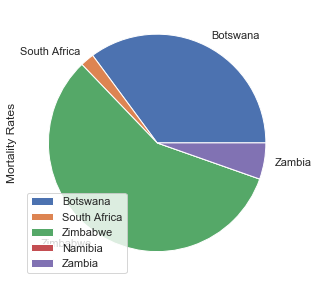

In [34]:
plot = countries_SA_mort.plot.pie(y='Mortality Rates', figsize=(5, 5))

Notwithstanding that if you take a look at the figures in terms of confirmed cases, South Africa would lead, in Southern Africa. This shows that more people in our neighbouring country are getting the virus compared to us(Botswana); but because of population size in relation; their mortality rate is lower. Though in actual fact more people would have died that side.

The following vertical bar graphs clearly illustrate this fact.

### Confirmed Cases Comparison between Botswana & it neighbours

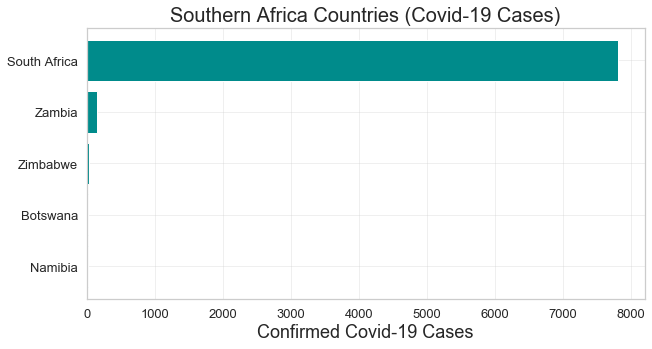

In [35]:
#Plotting Confirmed Cases Comparison between Botswana & it neighbours
confirmed_cases = plt.figure(figsize=(10,5))
confirmed_cases.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(countries_Southern_Africa.sort_values('Confirmed')["Confirmed"].index[-10:],countries_Southern_Africa.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Covid-19 Cases",fontsize=18)
plt.title("Southern Africa Countries (Covid-19 Cases)",fontsize=20)

plt.grid(alpha=0.3)


### Death Cases Comparison between Botswana & it neighbours

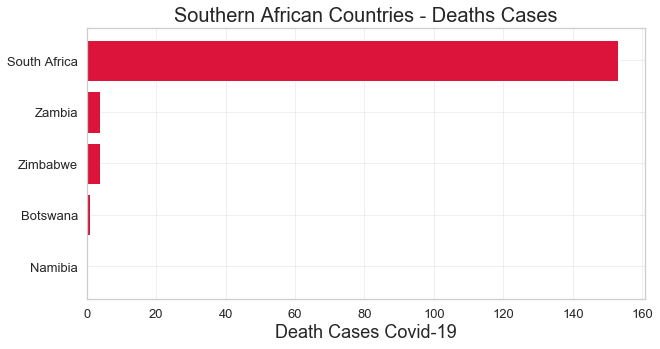

In [36]:
#Plotting Death Cases Comparison between Botswana & it neighbours
confirmed_deaths = plt.figure(figsize=(10,5))
confirmed_deaths.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(countries_Southern_Africa.sort_values('Deaths')["Deaths"].index[-10:],countries_Southern_Africa.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Death Cases Covid-19",fontsize=18)
plt.title("Southern African Countries - Deaths Cases",fontsize=20)
plt.grid(alpha=0.3,which='both')


As clearly seen above; with the death cases it seems Botswana is on par with the other three Southern African Countries and South Africa is far in a bigger crisis then us Botswana. Yes South Africa are in a crisis but when the figures are taken properly in relation to the confirmed cases in each country as shown on pie chart and Table above Botswana scores first in mortality rates.

That simply means the rate at which people die in relation to confirmed cases is higher in Botswana. This rate if one take it and comapre it to the rest of the world is still relatively high.

For illustration purposes of this fact I will plot our mortality rate amongst some of the hardest hit nations in the world.


In [43]:
countries_world_mortality .style.background_gradient(axis=1).format("{:.0f}",subset=["Confirmed"])

,Confirmed,Deaths,Recorvered,Active,Mortality Rate (per 100)
US,432132,14817,nan,393409,3.430000
China,82867,3339,nan,1889,4.030000
Italy,139422,17669,nan,95262,12.670000
Spain,148220,14792,nan,85407,9.980000
United Kingdom,61474,7111,nan,54018,11.570000
Botswana,6,1,nan,5,16.670000


The graph above further illustrates my point that we in Botswana have to be careful on how we deal with this epidemic and put in strenous measures in place to mitigate. This is emphasized by fact that already we have a high mortality rates compared to some of the hardest hit countries in the world.

An illustration of the above as a pie chart..

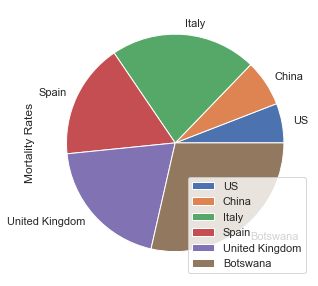

In [37]:
plot = countries_world_mort.plot.pie(y='Mortality Rates', figsize=(5, 5))

This clearly is evident that should the disease/virus follow the same trends as the most developed nations  we could reach catastrophic troubles here as we are no match to them in terms of facilities such as health specialists, equipment etc. So it is clear for me; Botswana has no option but to stay home.. It also indicates that the country leadership could be spot on on the 6 months monitoring and managing this situation. 

To further get the facts to support such an idea I will start by looking at the Covid-19 trends in some of these hard hit countries in relation to Botswana and South Africa:

<hr>




### Working on local data

This data as mentioned above is developend by munging from various sources, and mostly where possible from Government Facebook Page

I will start by loading the datasets into dataframes and testing below to check if everything is ok.

In [86]:
bots_confirmed.head(60)

,Date,Quarantined,Suspected;Cases,Tested;Positive,Tested;Negative,Pending,Deaths,Unnamed: 7,Testing;per;;%;of;population,Increase;since;last;Last;Death,Increase;since;last;Confirmed,Source
0,26/03/2020,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
1,27/03/2020,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
2,28/03/2020,1753.0,259.0,0.0,90.0,169.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
3,29/03/2020,NaN,93.0,3.0,90.0,NaN,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
4,30/03/2020,NaN,NaN,3.0,0.0,NaN,0,NaN,NaN,0,NaN,www.africanews.com/statistics/2020/01/04botswa...
5,31/03/2020,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,BwGovernment;;;;;;;;;;;;;;;
6,01/04/20,1856.0,593.0,4.0,189.0,404.0,1,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
7,02/04/20,NaN,670.0,4.0,562.0,96.0,1,NaN,NaN,1,1.0,DumaFm;FB;page;;;;;;;;;;;;;
8,03/04/20,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,0.0,https://web.facebook.com/109466677345255/photo...
9,04/04/20,NaN,820.0,4.0,656.0,164.0,1,NaN,NaN,0,0.0,BwGovernment;;;;;;;;;;;;;;;


In [87]:
bots_confirmed.columns

Index(['Date', 'Quarantined', 'Suspected;Cases', 'Tested;Positive',
       'Tested;Negative', 'Pending', 'Deaths', 'Unnamed: 7',
       'Testing;per;;%;of;population', 'Increase;since;last;Last;Death',
       'Increase;since;last;Confirmed', 'Source'],
      dtype='object')

The data is all tangled and need some cleaning and rearrangement before we can move on, I will start by deleting all rows without any values, that is NAN value rows.  But first I will rename some columns and start by dropping some rows, I wont need for now.

In [140]:
bots_confirmed.rename(columns={'Suspected;Cases':'Suspected Cases','Tested;Positive':'Tested Positive','Tested;Negative':'Tested Negative'}, inplace=True)
bots_confirmed

,Date,Quarantined,Suspected Cases,Tested Positive,Tested Negative,Pending,Deaths,Unnamed: 7,Testing;per;;%;of;population,Increase;since;last;Last;Death,Increase;since;last;Confirmed,Source
0,26/03/2020,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
1,27/03/2020,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
2,28/03/2020,1753.0,259.0,0.0,90.0,169.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
3,29/03/2020,NaN,93.0,3.0,90.0,NaN,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
4,30/03/2020,NaN,NaN,3.0,0.0,NaN,0,NaN,NaN,0,NaN,www.africanews.com/statistics/2020/01/04botswa...
5,31/03/2020,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,BwGovernment;;;;;;;;;;;;;;;
6,01/04/20,1856.0,593.0,4.0,189.0,404.0,1,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
7,02/04/20,NaN,670.0,4.0,562.0,96.0,1,NaN,NaN,1,1.0,DumaFm;FB;page;;;;;;;;;;;;;
8,03/04/20,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,0.0,https://web.facebook.com/109466677345255/photo...
9,04/04/20,NaN,820.0,4.0,656.0,164.0,1,NaN,NaN,0,0.0,BwGovernment;;;;;;;;;;;;;;;


In [141]:
bots_confirmed.drop(['Deaths','Increase;since;last;Last;Death','Source', 'Increase;since;last;Confirmed'], axis=1)

,Date,Quarantined,Suspected Cases,Tested Positive,Tested Negative,Pending,Unnamed: 7,Testing;per;;%;of;population
0,26/03/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,27/03/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,28/03/2020,1753.0,259.0,0.0,90.0,169.0,NaN,NaN
3,29/03/2020,NaN,93.0,3.0,90.0,NaN,NaN,NaN
4,30/03/2020,NaN,NaN,3.0,0.0,NaN,NaN,NaN
5,31/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/04/20,1856.0,593.0,4.0,189.0,404.0,NaN,NaN
7,02/04/20,NaN,670.0,4.0,562.0,96.0,NaN,NaN
8,03/04/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,04/04/20,NaN,820.0,4.0,656.0,164.0,NaN,NaN


Next I delete all rows without any value.

In [142]:
#Longer way of dropping unnecessary rows that i do not need.

bots_confirmed.drop([bots_confirmed.index[0] , bots_confirmed.index[1],
                     bots_confirmed.index[4] , bots_confirmed.index[5],
                    bots_confirmed.index[8] , bots_confirmed.index[9],
                    bots_confirmed.index[11] , bots_confirmed.index[12], 
                    bots_confirmed.index[13] , bots_confirmed.index[15], 
                    bots_confirmed.index[16] , bots_confirmed.index[17], 
                    bots_confirmed.index[17] , bots_confirmed.index[18],
                    bots_confirmed.index[19] , bots_confirmed.index[23],
                    bots_confirmed.index[24] , bots_confirmed.index[26],
                    bots_confirmed.index[27] , bots_confirmed.index[29], 
                    bots_confirmed.index[30] , bots_confirmed.index[31], 
                    bots_confirmed.index[32] , bots_confirmed.index[35],
                    bots_confirmed.index[36] , bots_confirmed.index[38],
                    bots_confirmed.index[38] , bots_confirmed.index[39],
                    bots_confirmed.index[40] , bots_confirmed.index[41],
                    bots_confirmed.index[42]
                    ])

,Date,Quarantined,Suspected Cases,Tested Positive,Tested Negative,Pending,Deaths,Unnamed: 7,Testing;per;;%;of;population,Increase;since;last;Last;Death,Increase;since;last;Confirmed,Source
2,28/03/2020,1753.0,259.0,0.0,90.0,169.0,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
3,29/03/2020,NaN,93.0,3.0,90.0,NaN,0,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
6,01/04/20,1856.0,593.0,4.0,189.0,404.0,1,NaN,NaN,0,NaN,https://web.facebook.com/109466677345255/photo...
7,02/04/20,NaN,670.0,4.0,562.0,96.0,1,NaN,NaN,1,1.0,DumaFm;FB;page;;;;;;;;;;;;;
10,05/04/20,2065.0,966.0,6.0,804.0,156.0,1,NaN,NaN,0,0.0,BwGovernment;;;;;;;;;;;;;;;
14,09/04/20,NaN,2527.0,13.0,2514.0,NaN,1,NaN,NaN,0,7.0,https://web.facebook.com/109466677345255/photo...
20,15/04/2020,NaN,3602.0,15.0,3587.0,NaN,1,NaN,NaN,0,0.0,https://web.facebook.com/109466677345255/photo...
21,16/04/2020,NaN,3923.0,15.0,3908.0,NaN,1,NaN,NaN,0,0.0,https://web.facebook.com/109466677345255/photo...
22,17/04/2020,NaN,4434.0,15.0,4414.0,5.0,1,NaN,NaN,0,2.0,https://web.facebook.com/109466677345255/photo...
25,20/04/2020,NaN,5328.0,20.0,5306.0,2.0,1,NaN,NaN,0,5.0,https://web.facebook.com/109466677345255/photo...


In [144]:
data = {'columns': ['Suspected Cases', 'Tested Positive', 'Tested Negative','Pending','Death','% Testing Ratio'],
       '28/03/2020':[259,0,90,169,0,0],
       '29/03/2020':[259,3,90,166,0,0], 
       '01/04/2020':[593,4,189,404,1,0],
       '02/04/2020':[670,4,562,96,1,0],
       '04/04/2020':[820,4,656,164,1,0],
       '05/04/2020':[966,6,804,156,1,0],
       '06/04/2020':[1154,6,1148,0,1,0],
       '09/04/2020':[2527,13,2514,0,1,0], 
       '15/04/2020':[3602,15,3587,0,1,0],
       '16/04/2020':[3923,15,3908,0,1,0],
       '17/04/2020':[4434,15,4414,5,1,0],
       '20/04/2020':[5328,20,5306,2,1,0],
       '23/04/2020':[6016,22,5994,0,1,0],
       '28/04/2020':[6548,23,6525,0,1,0],
       '29/04/2020':[6809,23,6876,0,1,0],
       '01/05/2020':[7675,23,7652,0,1,0],
       '07/05/2020':[9066,23,9043,0,1,0],}
cases = DataFrame(data)
cases

,columns,28/03/2020,29/03/2020,01/04/2020,02/04/2020,04/04/2020,05/04/2020,06/04/2020,09/04/2020,15/04/2020,16/04/2020,17/04/2020,20/04/2020,23/04/2020,28/04/2020,29/04/2020,01/05/2020,07/05/2020
0,Suspected Cases,259,259,593,670,820,966,1154,2527,3602,3923,4434,5328,6016,6548,6809,7675,9066
1,Tested Positive,0,3,4,4,4,6,6,13,15,15,15,20,22,23,23,23,23
2,Tested Negative,90,90,189,562,656,804,1148,2514,3587,3908,4414,5306,5994,6525,6876,7652,9043
3,Pending,169,166,404,96,164,156,0,0,0,0,5,2,0,0,0,0,0
4,Death,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,% Testing Ratio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Everything looks fine and I have cleaned the data. I can now analyze the data I collected locally. 

<hr>

Please note that the NaN stands for Not a Number which is what pandas uses as a stand in value for missing data. Wherever there is the NaN ; data is missing If you going through this notebook and can contribute to completing the data you would most welcome. Data collection in Botswana is a tedious and not straight forward job though generally data collection and preparation is tricky the world over.

<span style="font:12px;">NOTE:</span>
Now that the data is incosistent and have so many gaps, I am planning on retrieving the available data from the dataset into my own dataFrame before I can work with it in my analysis, in what is known as data wrangling. 

Great, the above table now looks better then the above data farame: bots_confirmed and will enable for proper analysis but for the use of graphs I will further change it again to look as follows

In [14]:
# Reaarranging the above data frame
case_bots = pd.DataFrame( {"Suspected Cases" : [259,259,593,670,820,966,1154,2527,3602,3923,4434,5328,6016,6548,6809,7675,9066],
                           "Tested Positive" : [0,3,4,4,4,6,6,13,15,15,15,20,22,23,23,23,23],
                           "Tested Negative" : [90,90,189,562,656,804,1148,2514,3587,3908,4415,5306,5994,6525,6876,7652,9043],
                           "Death"           : [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                           "Pending"         : [169,166,404,96,164,156,0,0,0,0,5,2,0,0,0,0,0],
                           "% Testing Ratio" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
                           index=['28/03/2020', '29/03/2020', '01/04/2020', '02/04/2020', '04/04/2020', '05/04/2020', '06/04/2020', '09/04/2020',
                                 '15/04/2020', '16/04/2020', '17/04/2020', '20/04/2020', '23/04/2020', '28/04/2020', '29/04/2020', '01/05/2020',
                                  '07/05/2020'])


case_bots

,Suspected Cases,Tested Positive,Tested Negative,Death,Pending,% Testing Ratio
28/03/2020,259,0,90,0,169,0
29/03/2020,259,3,90,0,166,0
01/04/2020,593,4,189,1,404,0
02/04/2020,670,4,562,1,96,0
04/04/2020,820,4,656,1,164,0
05/04/2020,966,6,804,1,156,0
06/04/2020,1154,6,1148,1,0,0
09/04/2020,2527,13,2514,1,0,0
15/04/2020,3602,15,3587,1,0,0
16/04/2020,3923,15,3908,1,0,0


I will now make a basic plot of the above reaaranged data frame

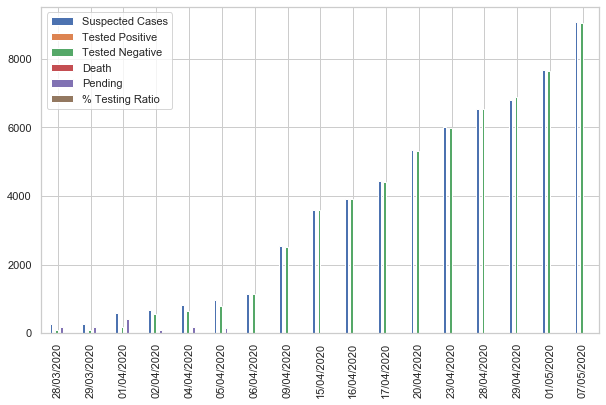

In [190]:
case_bots.plot(kind='bar', figsize=(10, 6))

A basic graph. Everything eems to be working but now let me get back to graphs that are more meaningful.

In [158]:
suspected_cases =  case_bots[['Suspected Cases', 'Tested Negative', 'Tested Positive']]
suspected_cases.head(18)


,Suspected Cases,Tested Negative,Tested Positive
28/03/2020,259,90,0
29/03/2020,259,90,3
01/04/2020,593,189,4
02/04/2020,670,562,4
04/04/2020,820,656,4
05/04/2020,966,804,6
06/04/2020,1154,1148,6
09/04/2020,2527,2514,13
15/04/2020,3602,3587,15
16/04/2020,3923,3908,15


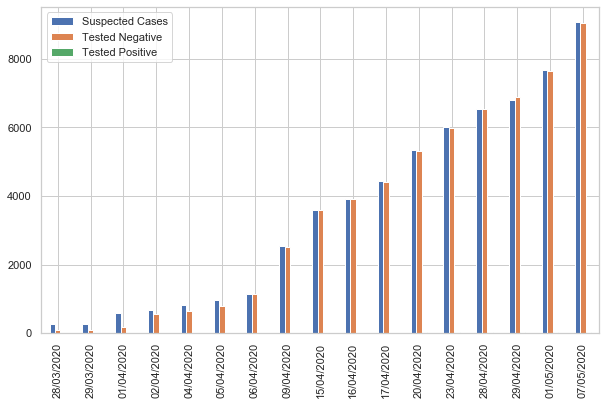

In [191]:
suspected_cases.plot(kind='bar',figsize=(10, 6))

Text(0, 0.5, 'Number of Cases')

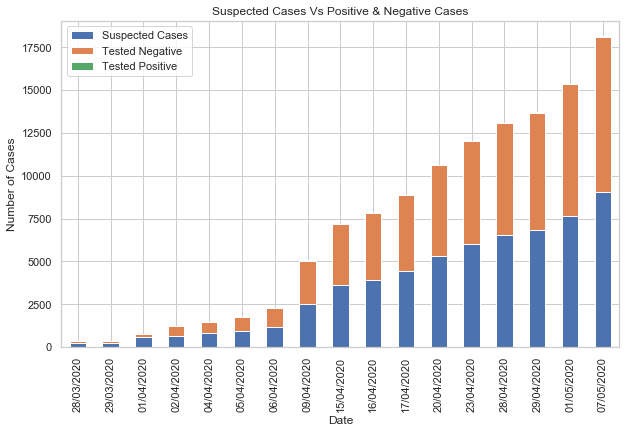

In [192]:
#Stacked bar graph to compare suspected cases vs Posistive vs Negative
sus_plot = suspected_cases.plot(kind='bar',stacked=True,title="Suspected Cases Vs Positive & Negative Cases",figsize=(10, 6))
sus_plot.set_xlabel("Date")
sus_plot.set_ylabel("Number of Cases")


Figure 2.1.1 


<span style="font-size:20px; ">Analysis</span>

<h1>Suspected Cases(Tested) Vs Positive & Negative Cases(Results) </h1>

<hr>

The graphs above make it is clear that for tests that are currently done almost 90% return in the negative. This is a clear indication that the disease is still under control in Botswana. 

It is also can be derived from the graph that when the testing began on the 28/03/2020 the testing was very slow and the country had a high number of suspected cases that tested for covid-19 who did not know their status. As time went on especially from the 02/04/2020 the testing pace or efficiency greatly increased as can be seen by the almost even number of stacked graphs(that is the Orange (Tested Negative) and Blue (suspected Cases)).

NB: Please note that in relation to those who tested Negative vs Suspected Cases,  those who tested positive are only a fraction of the aforementioned Suspected Cases and those who tested Negative as whole and therefore it will not be clear on the above bar graph(appears that those who tested positive are available).

Let me illustrate Positive tests over time in the following bar graph alone for clarity..

<h5> Bar graph: illustration of deaths since 28/03/2020 </h5>

In [162]:
suspected_cases_a =  case_bots[['Tested Positive']]
suspected_cases_a.head(18)

,Tested Positive
28/03/2020,0
29/03/2020,3
01/04/2020,4
02/04/2020,4
04/04/2020,4
05/04/2020,6
06/04/2020,6
09/04/2020,13
15/04/2020,15
16/04/2020,15


Text(0, 0.5, 'Number of Positive Cases')

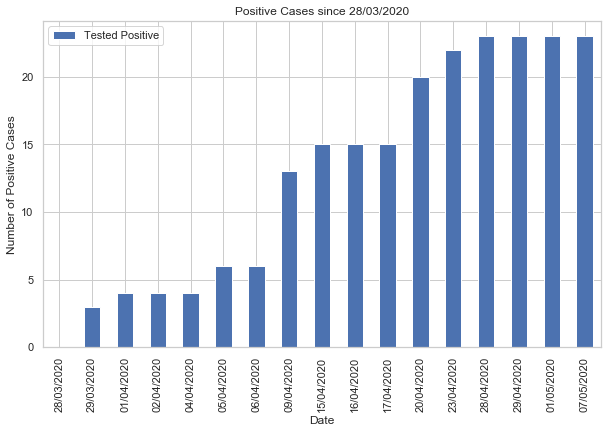

In [193]:
positive_plot = suspected_cases_a.plot(kind='bar',stacked=False,title="Positive Cases since 28/03/2020",figsize=(10, 6))
positive_plot.set_xlabel("Date")
positive_plot.set_ylabel("Number of Positive Cases")


<span style="font-size:20px; ">Analysis</span>

It is clear from the above graph that there has been a steady increase in the number of Positive Cases increases over the days since first date of data release. A closer look reveals that number of positive cases have been steadly increasing at about <span style="font-size:18px;" > 2 cases per every 3days </span> from the 29/03/2020 to 06/04/2020 before finaly more than doubling up to <span style="font-size:18px;" > 13 cases </span> on the 09/03/2020. The trend then follows for following days

The histograph below clearly too illustrate the above finding. 

Text(0, 0.5, 'Average number of days per Case Testing Positive')

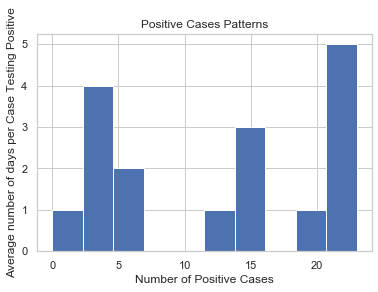

In [164]:
# Histogram help us to look at the positive cases in more detail.
hist_plot = suspected_cases['Tested Positive'].hist()
hist_plot.set_title("Positive Cases Patterns")
hist_plot.set_xlabel("Number of Positive Cases")
hist_plot.set_ylabel("Average number of days per Case Testing Positive")

The line graph below clearly illustrate the rate of increase in confirmed positive cases:

<span style="font-size:14px; color:blue;"> Note</span>
But before I can plot the line series I need to have the "date" data on above graph in the format of a datetime datatype for the graph to work. The above data as it is now in a string format. For quick analysis I will hardcode the data as follows:

But note with a large set of data this could be tedious , it would better to have the date in datetime format so you can use some of the pandas function to easily do the job.

### COVID-19 Spread Analysis
<hr>

The spread Analysis will be two sections as below
1. The spread across Botswana
2. The spread trends in the world

<h5>Botswana Spread Analysis</h5>

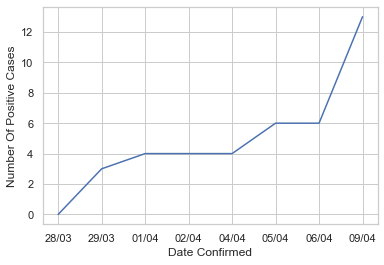

In [50]:
#plotting a line graph

plt.plot(['28/03', '29/03', '01/04', '02/04', '04/04', '05/04', '06/04', '09/04'],[0,3,4,4,4,6,6,13])
plt.ylabel('Number Of Positive Cases')
plt.xlabel('Date Confirmed')
plt.show()

The above graph clearly indicates the rate at which confirmed cases are revealed in Botswana. As seen the graph is steadily moving up and starkly jumped upward on the 09/04/2020.

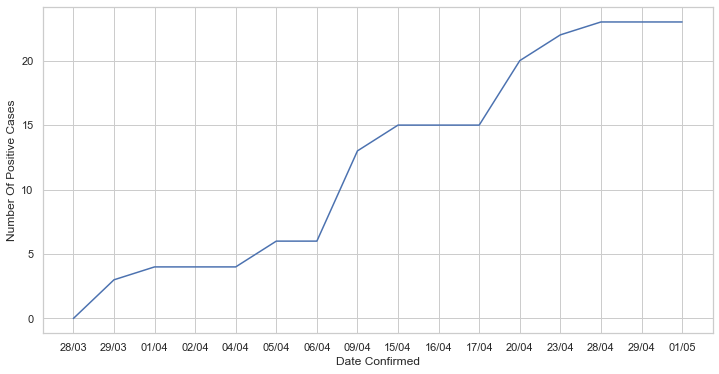

In [184]:
#plotting a line graph
plt.figure(figsize=(12, 6))
plt.plot(['28/03', '29/03', '01/04', '02/04', '04/04', '05/04', '06/04', '09/04','15/04', '16/04', '17/04', '20/04', '23/04', '28/04', '29/04', '01/05','01/05'],[0,3,4,4,4,6,6,13,15,15,15,20,22,23,23,23,23])
plt.ylabel('Number Of Positive Cases')
plt.xlabel('Date Confirmed')
plt.show()

The above graph clearly indicates the rate at which confirmed cases are revealed in Botswana. As seen the graph is steadily moving up and starkly jumped upward on the 09/05/2020, before stabilizing prior to another upward surge.

<h5>Infection Rate</h5>

Below is the infection rate formula commonly used by health specialists as per information on:

    - www.wikipedia
    
    
 <img style="margin-left:25px;" src="img/infection_rate.png"/> 

To use this formula I first have to create it as a function so we be able to use it later on in our analysis. the function is as below:

In [11]:
def rate_infection(number_infections, number_atrisk):
    K = 100
    infection_rate =  K * number_infections/number_atrisk
    
    return infection_rate

#this function in a more straight forward report or notebook we will have it under the functions definition sections as ealier on in the notebook

In [12]:
  rate_infection(4,50)

8.0

I will calculate the Covid-19 rate of infection in Botswana by basing those Tested Positive(number of infections) over the Suspected Cases(Number of those in a population at risks of infection). To get a clear picture of the movement of this rate it is best to express the rates as per the dates in which they were released so we can be able to express the rate(infection) over a period and show it as a graph. 

 First let show Tested Cases and Positive Cases as a table as below:
 
 NB:Please note 
 
  - Suspected Cases: Number of those in a population at risk of infection
  - Tested Positive: Infected
 

In [16]:
case_bots['Infection Rate'] =  rate_infection(case_bots['Tested Positive'],case_bots['Suspected Cases'])
suspected_cases =  case_bots[['Suspected Cases', 'Tested Positive','Infection Rate']]
suspected_cases.head(18)



,Suspected Cases,Tested Positive,Infection Rate
28/03/2020,259,0,0.000000
29/03/2020,259,3,1.158301
01/04/2020,593,4,0.674536
02/04/2020,670,4,0.597015
04/04/2020,820,4,0.487805
05/04/2020,966,6,0.621118
06/04/2020,1154,6,0.519931
09/04/2020,2527,13,0.514444
15/04/2020,3602,15,0.416435
16/04/2020,3923,15,0.382360


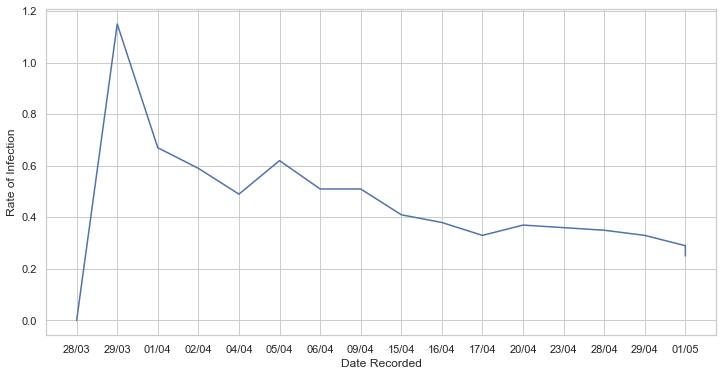

In [18]:
#plotting a line graph
plt.figure(figsize=(12, 6))
plt.plot(['28/03', '29/03', '01/04', '02/04', '04/04', '05/04', '06/04', '09/04','15/04', '16/04', '17/04', '20/04', '23/04', '28/04', '29/04', '01/05','01/05'],[0,1.15,0.67,0.59,0.49,0.62,0.51,0.51,0.41,0.38,0.33,0.37,0.36,0.35,0.33,0.29,0.25])
plt.ylabel('Rate of Infection')
plt.xlabel('Date Recorded')
plt.show()

The following graph shows the rate of infection over a period of time. It is certainly declining.

<h5>Quick Comparison Botswana Vs World Spread Analysis</h5>

Below we show a graph showing the spread of the disease in the world.

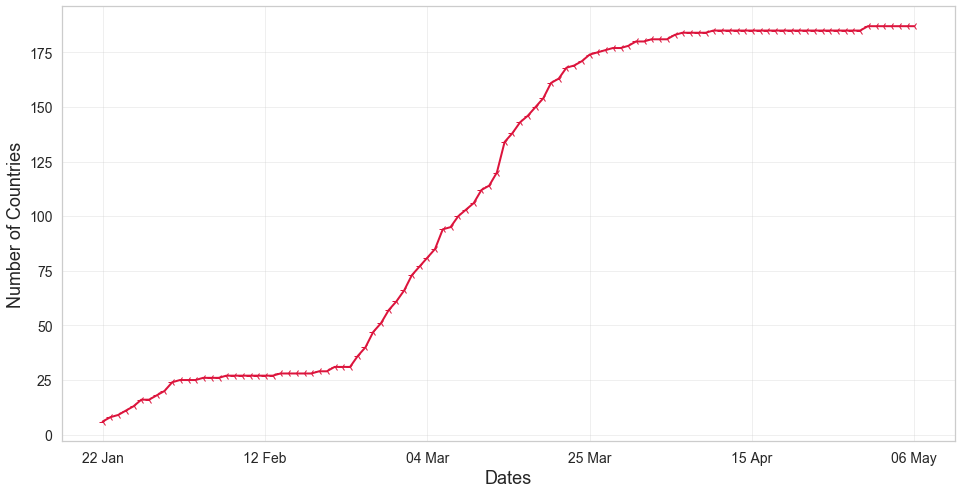

In [27]:
case_nums_country = confirmed_df.groupby("Country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(16,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=2, linestyle='-', marker='3',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)
plt.grid(alpha = 0.3)

plt.show()
plt.close()



<h5>Pie Chart Analysis: comparing Total suspected cases vs Positive Cases vs Negative Cases</h5> 

Below I plot Total Suspected Cases against Positive Cases vs Negative Cases to show the severity of the pandemic in Botswana. This data will be plotted on the last date cases.

In [187]:
#loading last confirmed data
pie_tb = cases['07/05/2020']
pie_tb.head()


0    9066
1      23
2    9043
3       0
4       1
Name: 07/05/2020, dtype: int64

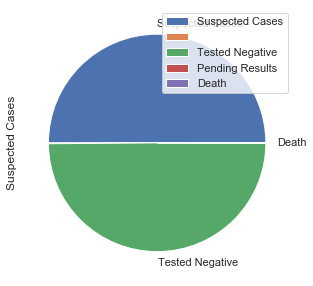

In [171]:
pie_total_cases = pd.DataFrame({'Suspected Cases': [9066, 23, 9043 , 0, 1]},
                  index=['Suspected Cases', '', 'Tested Negative', 'Pending Results', 'Death'])
plot = pie_total_cases.plot.pie(y='Suspected Cases', figsize=(5, 5))

The pie chart simply illustrate what has already been alluded before; that it seems for people that are tested for the disease most of them, their results come out negative. This is a good thing for Botswana. It would be great then if now all the 13 cases recorded could recover. As it is, no data has been recorded of any recovery in Botswana yet.

Now going over the graphs and analysis it may seem that the testing and rate of results coming out seems to be adequate. But for us to have a better appreciation of this we should look at the some variables that better determines whether 

 - the testing being done is sufficient ?
 - and satisfactory?

To determine the above I will look at the

- Testing Centres in Botswana
- Total Tested(Suspected Cases) in relation to the population
- % Testing Ratio

<h5> Total tested people in relation to country population</h5>

I will compare the tested numbers in relation to population size of Botswana as percentage to see if the numbers being tested are really satisfactory as figure 2.1.1 seems to suggest.

In [199]:
suspected_cases =  case_bots[['Suspected Cases', 'Tested Positive','% Testing Ratio']]
suspected_cases.head(18)

,Suspected Cases,Tested Positive,% Testing Ratio
28/03/2020,259,0,0
29/03/2020,259,3,0
01/04/2020,593,4,0
02/04/2020,670,4,0
04/04/2020,820,4,0
05/04/2020,966,6,0
06/04/2020,1154,6,0
09/04/2020,2527,13,0
15/04/2020,3602,15,0
16/04/2020,3923,15,0


In the previous version I just calculated the testing ratio manually because the data was next to nothing, ut now it is becoming more. so I have to explore the power of python and pandas I will calculate it as follows:.


Manual calculation:

In [204]:
# Adding the testing capcity as percentage to the data frame

testing_capacity = pd.DataFrame( {"Suspected(Total Tested)" : [259,259,593,670,820,966,1154,2527],
                           "% Testing Ratio" : [0.01,0.01,0.02,0.03,0.03,0.04,0.05,0.11]},
                           index=['28/03/2020', '29/03/2020', '01/04/2020', '02/04/2020', '04/04/2020', '05/04/2020', '06/04/2020', '09/04/2020'])
testing_capacity.head(8)

,Suspected(Total Tested),% Testing Ratio
28/03/2020,259,0.01
29/03/2020,259,0.01
01/04/2020,593,0.02
02/04/2020,670,0.03
04/04/2020,820,0.03
05/04/2020,966,0.04
06/04/2020,1154,0.05
09/04/2020,2527,0.11


Next:

In [201]:
case_bots['% Testing Ratio'] = (case_bots['Suspected Cases']/2351627)*100
case_bots['% Testing Ratio']

28/03/2020    0.011014
29/03/2020    0.011014
01/04/2020    0.025217
02/04/2020    0.028491
04/04/2020    0.034869
05/04/2020    0.041078
06/04/2020    0.049072
09/04/2020    0.107458
15/04/2020    0.153171
16/04/2020    0.166821
17/04/2020    0.188550
20/04/2020    0.226567
23/04/2020    0.255823
28/04/2020    0.278446
29/04/2020    0.289544
01/05/2020    0.326370
07/05/2020    0.385520
Name: % Testing Ratio, dtype: float64

In [203]:
case_bots['% Testing Ratio'] = (case_bots['Suspected Cases']/2351627)*100
suspected_cases =  case_bots[['Suspected Cases', 'Tested Positive','% Testing Ratio']]
suspected_cases.head(18)

,Suspected Cases,Tested Positive,% Testing Ratio
28/03/2020,259,0,0.011014
29/03/2020,259,3,0.011014
01/04/2020,593,4,0.025217
02/04/2020,670,4,0.028491
04/04/2020,820,4,0.034869
05/04/2020,966,6,0.041078
06/04/2020,1154,6,0.049072
09/04/2020,2527,13,0.107458
15/04/2020,3602,15,0.153171
16/04/2020,3923,15,0.166821


figure 2.1.2

So far the tested numbers expressed as a percentage from the table (figure 2.1.2) above clearly are not satisfactory. The table clearly shows that as of the last updated data on the 09/04/2020 only about 0.11% of the population was tested. 

This could also be interpreted that given the little data we have we do not yet have a proper appreciation of extent of the pandemic in Botswana. 

To put everything in perspective we have to appreciate that as of 09/04/2020 Botswana only had two testing centres with a testing capacity of 900people per day. 

Up to 07/05/2020 only 0.39% have been tested.

### Testing capacity

In [56]:
# Testing Capacity Botswana
testing_Centres = 2
a = 2351627
b = '900/people per day'

# Displaying the Capacity

display(HTML("<h1 style='padding:5px; font-size: 25px;'>BOTSWANA'S TESTING CAPACITY</h1>"
             "<div style = 'background-color:Transparent; padding: 30px '>" 
             "<span style='background-color:#023246; padding:20px; color: #ffff; font-size:20px;margin-left:0px float:left; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16); '> TESTING FACILITIES "  + str(testing_Centres) +"</span>" +
             "<span style='background-color:#D4D4CE; padding:20px; color: #ffff; font-size:20px;margin-left:5px; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16);'> CAPACITY " + str(b) + "</span>"+
              "<span style='background-color:PURPLE; padding:20px; color: #ffff; font-size:20px;margin-left:5px; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16);'> POPULATION " + str(a) + "</span>"+
             "</div>")
       )



This means that Botswana have a 0.03% capacity to test for covid-19 per day.  Let take a closer look at the following graph to test if it currently such capacity.

<h5>Quick analysis</h5>

Pandas has a quick tool in the form of a command known as describe(). If we run it as follows; we will get quick analysis of table (figure 2.1. ) above in the notebook. 

In [205]:
testing_capacity.describe()

,Suspected(Total Tested),% Testing Ratio
count,8.000000,8.000000
mean,906.000000,0.037500
std,726.146778,0.032404
min,259.000000,0.010000
25%,509.500000,0.017500
50%,745.000000,0.030000
75%,1013.000000,0.042500
max,2527.000000,0.110000


In [206]:
testing_capacity['% Testing Ratio'].describe()

count    8.000000
mean     0.037500
std      0.032404
min      0.010000
25%      0.017500
50%      0.030000
75%      0.042500
max      0.110000
Name: % Testing Ratio, dtype: float64

A look at the above figures shows that the mean % testing ratio is about 0.037500. This is slightly above our (Botswana) testing capacity. So it conclude the analysis above by clearly outlining:

- Testing in Botswana though relatively low in relation to the population, it is satisfactory given the resources at our  
  disposal
- Testing was ramped since first dates of data reporting and as of date now slightly above what the country resources can   
  achieve per day

All of this is captured and illustrated in the table figure (2.1.3) and bar graph figure (2.1.4) below

In [207]:
#As of 09/04/2020
testing_capacity_Ave = pd.DataFrame( {"Date" : [da_28 ,da_29,da_1,da_2,da_4,da_5,da_6,da_9],
                           "% Testing Ratio" : [0.01,0.01,0.02,0.03,0.03,0.04,0.05,0.11],
                           "% Testing Ratio Average" : [0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037]        },
                           )
testing_capacity_Ave

,Date,% Testing Ratio,% Testing Ratio Average
0,"Mar 28 2020, 00:00:00",0.01,0.037
1,"Mar 29 2020, 00:00:00",0.01,0.037
2,"Apr 01 2020, 00:00:00",0.02,0.037
3,"Apr 02 2020, 00:00:00",0.03,0.037
4,"Apr 04 2020, 00:00:00",0.03,0.037
5,"Apr 05 2020, 00:00:00",0.04,0.037
6,"Apr 06 2020, 00:00:00",0.05,0.037
7,"Apr 09 2020, 00:00:00",0.11,0.037


figure 2.1.3

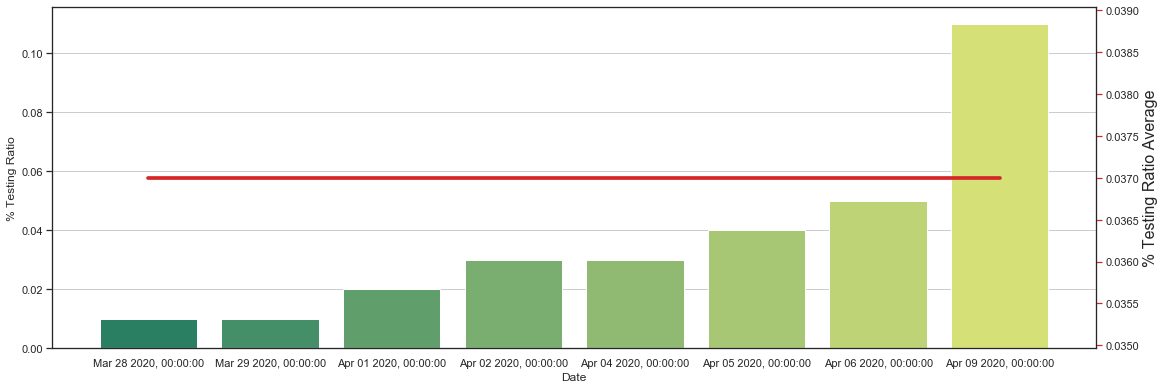

In [59]:
fig, ax1 = plt.subplots(figsize=(18.7,6.27))
color = 'tab:red'

ax2 = sns.set(style="ticks", rc={"lines.linewidth": 3.7})
ax1 = sns.barplot(x='Date', y='% Testing Ratio', data = testing_capacity_Ave, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('% Testing Ratio Average', fontsize=16)
ax2 = sns.lineplot(x='Date', y='% Testing Ratio Average', data = testing_capacity_Ave, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

figure 2.1.4

In the old example I formatted the date manually and line by line as can be seen on the cleaning section on this note book, below I will formatt it using Python code.#


In [223]:

case_bots['Date'] = [da_28 ,da_29,da_1,da_2,da_4,da_5,da_6,da_9,da_10 ,da_11,da_12,da_13,da_14,da_15,da_16,da_17,da_18]
case_bots['% Testing Ratio'] = (case_bots['Suspected Cases']/2351627)*100
case_bots['% Testing Ratio Average'] = 0.037
suspected_cases =  case_bots[['Date','Suspected Cases', 'Tested Positive','% Testing Ratio','% Testing Ratio Average']]
suspected_cases.head(18)


,Date,Suspected Cases,Tested Positive,% Testing Ratio,% Testing Ratio Average
28/03/2020,"Mar 28 2020, 00:00:00",259,0,0.011014,0.037
29/03/2020,"Mar 29 2020, 00:00:00",259,3,0.011014,0.037
01/04/2020,"Apr 01 2020, 00:00:00",593,4,0.025217,0.037
02/04/2020,"Apr 02 2020, 00:00:00",670,4,0.028491,0.037
04/04/2020,"Apr 04 2020, 00:00:00",820,4,0.034869,0.037
05/04/2020,"Apr 05 2020, 00:00:00",966,6,0.041078,0.037
06/04/2020,"Apr 06 2020, 00:00:00",1154,6,0.049072,0.037
09/04/2020,"Apr 09 2020, 00:00:00",2527,13,0.107458,0.037
15/04/2020,"Apr 15 2020, 00:00:00",3602,15,0.153171,0.037
16/04/2020,"Apr 16 2020, 00:00:00",3923,15,0.166821,0.037


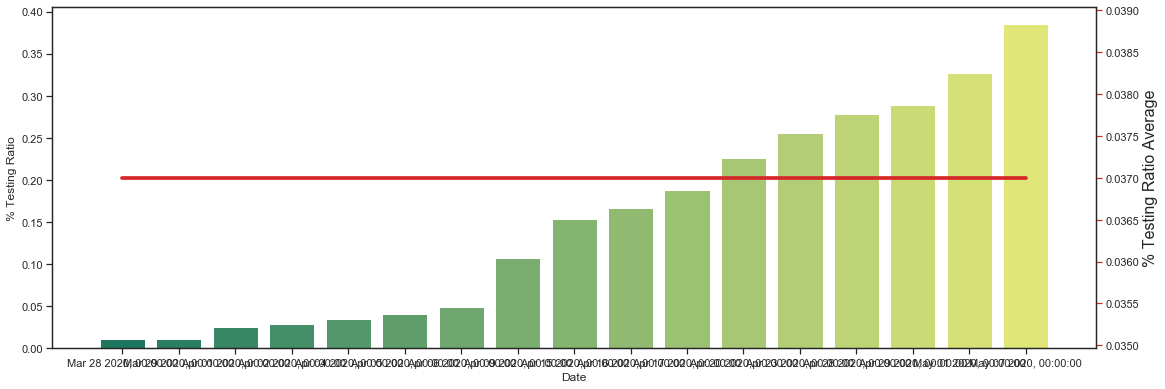

In [230]:
fig, ax1 = plt.subplots(figsize=(18.7,6.27))
color = 'tab:red'

ax2 = sns.set(style="ticks", rc={"lines.linewidth": 3.7})
ax1 = sns.barplot(x='Date', y='% Testing Ratio', data = suspected_cases, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('% Testing Ratio Average', fontsize=16)
ax2 = sns.lineplot(x='Date', y='% Testing Ratio Average', data = suspected_cases, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

The red line on the graph illustrate the average testing which is slightly above the testing capacity possible at present in relation to the actual testing rate represented by the green bars. The changing of the bars from the dark green to yellow also illustrate the increasing in testing rate as the days go on.

<h5>Summary analysis capacity</h5>

Testing is going as per our capacity given the current facilities, and as of 07/05/2020 been above our testing capacity. In short so far the following people in Botswana have been tested:

In [225]:
total_tested = cases['07/05/2020']
total_tested

0    9066
1      23
2    9043
3       0
4       1
5       0
Name: 07/05/2020, dtype: int64

### Total people tested

In [231]:
per = 9066/2351627
'{0:.3f}'.format(per)

# Displaying total people tested as a percentage

display(HTML("<h1 style='padding:5px; font-size: 25px;'>Total People Tested %</h1>"
             "<div style = 'background-color:Transparent; padding: 50px '>" +
              "<span style='background-color:PURPLE; width:100%; padding:25px 150px 25px 150px; color: #ffff; font-size:20px;margin-left:280px; border: 1px solid #e0e0e0;box-shadow: 0 3px 6px 1px rgba(0, 0, 0, 0.16);'>" + str('{0:.3f}'.format(per)) + " % </span>"+
             "</div>")
       )

So as of now are not really clear with the real picture of the pandemic in the country. We are basically banking on the figures coming out negative after tests as well as not many people getting sick locally.

So it follows logically that this to some extent might be true, most people are not sick or the disease has not yet taken foot in the country.

<span style="font-size:18px;">Mapping Covid-19 in Botswana</span>

With this in mind it would make sense in looking at confirmed cases. Where in the country are they; so as to allow for proper decisions to be made. For example where it appears to be prevalent the government might cordon off the areas where most cases have benn confirmed.




### Geographic Presentation of Covid-19  

<hr>

The map of the whole country will show graphically which places in country are affected the most or have confirmed cases. It will gives us a broader picture say which places need to be coordoned off from others as per cases found in the different areas.

### Botswana Confirmed Cases on Map

But before we import the Botswana map let us create a data frame for all the confirmed cases according to their locations as confirmed on public available data: Please note the data I am using below is only provided as in place not exact locations or coordinates provided.. so it is an assumption.

In [7]:
data = {'Address': ['Gaborone', 'Gaborone', 'Gaborone','Gaborone', 'Gaborone', 'Gaborone','Gaborone', 'Gaborone', 'Gaborone',
                   'Gaborone', 'Gaborone', 'Gaborone','Gaborone', 'Ramotswa','Molepolole', 'Molepolole', 'Molepolole','Metsimotlhabe',
                    'Metsimotlhabe', 'Metsimotlhabe','Metsimotlhabe', 'Mahalapye','Siviya'],
        'y': ['-24.6282','-24.5999','-24.6548','-24.6222','-24.5729','-24.6428','-24.4582','-24.6899','-24.7448',
              '-24.6112','-24.7529','-24.8528','-24.9756','-24.6282', '-24.3661','-24.3211','-24.3635','-24.5421','-24.3612','-24.3311',
              '-24.5533','-23.1078','-21.0831'],
        
        
        'x': ['25.9448','25.8875','25.9548','25.9564','25.9863','25.9687','25.9863','25.9899','25.9448',
              '25.9562','25.9529','25.9448','25.9448','25.5864', '25.3661','25.4990','25.4685','25.5421','25.5012','25.4814',
              '25.4023','26.8321','27.6743']
    
       }
dataPlaces = pd.DataFrame(data=data)
dataPlaces

,Address,y,x
0,Gaborone,-24.6282,25.9448
1,Gaborone,-24.5999,25.8875
2,Gaborone,-24.6548,25.9548
3,Gaborone,-24.6222,25.9564
4,Gaborone,-24.5729,25.9863
5,Gaborone,-24.6428,25.9687
6,Gaborone,-24.4582,25.9863
7,Gaborone,-24.6899,25.9899
8,Gaborone,-24.7448,25.9448
9,Gaborone,-24.6112,25.9562


Now that we have the coordinates, of the places of confirmed cases; I import folium to start dealing with maps.

In [8]:
import folium

print('Folium imported!')

Folium imported!


In [9]:
# Botswana latitude and longitude values
latitude = -22.550
longitude = 27.133

# create map and display it
botswana_map = folium.Map(location=[latitude, longitude], zoom_start=8)

# display the map of Botswana
botswana_map

In [10]:

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(dataPlaces.y, dataPlaces.x):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='Yellow',
            fill=True,
            fill_color='Red',
            fill_opacity=0.6
        )
    )

# add incidents to map
botswana_map.add_child(incidents)

### Botswana Prediction

Please refer to an earlier piece I wrote on an estimation model.

The link is as follows:

<a href="https://github.com/Mmusi/COVID-19-Botswana/blob/master/Botswana%20Covid-19%20Infections%20Estimations%20-%20Model%20Development.ipynb"> Botswana Covid-19 Infections Estimations - Model Development </a>
    

### References


- Logistic Growth Model
  https/www.maa.org/book/export/html
  
- https:statista.com/chart/21331/share-of-covid-19-cases-deaths-in-us-states-counties

- https//link.springer.com/chapter/10/111

- Humanitarian Data Exchange
  https:data.humdata.org/m/dataset
  
- https://pythonprogramming.net/live-graphs-matplotbib-tutorial

- Italian Corona Viruspressures and flattening the curve -an epidemiology expert explains 
  https://www.weforum.org/agenda/2020/03/covid-19coronavirus-epidemiology-expert-explains-Italian-death-rate/
  
- https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

- https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
  
- https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv

- Use logistic growth models 
https://courses.lumenlearning.com/ivytech-collegealgebra/chapter/use-logistic-growth-models/

 - BwGovernment Facebook page
 https://www.facebook.com/BwGovernment
 
 - Covid-19 MHW
 https://www.facebook.com/Covid-19 

- https://news.google.com/covid19/map?hl=en-BW&gl=BW&ceid=BW%3Aen&mid=%2Fm%2F0166v
    
- https://www.gov.bw/#covid-19-map
    
- https://www.cdc.gov/

- https://coronavirus.jhu.edu/map.html